In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
# from mpl_toolkits.mplot3d import proj3d
import math
import random
from ipywidgets import Layout

In [2]:

def plot_the_result(points, line_parameters, title):
  figure = plt.figure()
  ax = figure.add_subplot()
  ax.set_xlim([-1,21])
  ax.set_ylim([-15,45])
  ax.set_title(title)
  ax.scatter(points[0,:], points[1,:], cmap='Greens')
  ax.plot([-10, 30], [-10 * line_parameters[0,0] + line_parameters[1,0], 30 * line_parameters[0,0]+ line_parameters[1,0]])

print("Initial configuration successfully done!")

Initial configuration successfully done!


In [3]:
def execute_the_line_function(x):
  return (x * 1.5 - 2)

In [4]:
def generate_random_points_on_a_line(number_of_points):
    generated_points = np.zeros((2, number_of_points))
    for index in range(number_of_points):
        generated_points[0,index] = random.uniform(0, 20)
        generated_points[1,index] = execute_the_line_function(generated_points[0,index])
    return generated_points

In [5]:
some_points_for_test_purpose = generate_random_points_on_a_line(10)
print(some_points_for_test_purpose)

[[ 8.31048478  8.25371554 11.0658732   4.00903545  5.69771309 11.03106934
   5.9321193   7.20623801 16.37426915 16.78718784]
 [10.46572718 10.38057331 14.5988098   4.01355317  6.54656964 14.54660402
   6.89817895  8.80935701 22.56140373 23.18078176]]


In [6]:
def get_point_coordinates_formatted(points):
  formatted_string = ''
  for index in range(points.shape[1]):
    formatted_string += f'x,y: {(points[0][index], points[1][index])}\n'
  return formatted_string

print(f'Output for geeks:\n{some_points_for_test_purpose}\n\n')
print(f'Output for human beings:\n{get_point_coordinates_formatted(some_points_for_test_purpose)}')

Output for geeks:
[[ 8.31048478  8.25371554 11.0658732   4.00903545  5.69771309 11.03106934
   5.9321193   7.20623801 16.37426915 16.78718784]
 [10.46572718 10.38057331 14.5988098   4.01355317  6.54656964 14.54660402
   6.89817895  8.80935701 22.56140373 23.18078176]]


Output for human beings:
x,y: (8.310484784801634, 10.465727177202451)
x,y: (8.253715541518819, 10.380573312278228)
x,y: (11.065873201405068, 14.598809802107603)
x,y: (4.009035449124536, 4.0135531736868035)
x,y: (5.697713093299708, 6.546569639949562)
x,y: (11.031069344250334, 14.5466040163755)
x,y: (5.9321192991589395, 6.898178948738408)
x,y: (7.206238006711101, 8.809357010066652)
x,y: (16.374269153718, 22.561403730577)
x,y: (16.7871878415997, 23.180781762399548)



In [7]:
def add_noise_to_the_points(points, standard_deviation):
    noisy_points = np.copy(points)
    print(noisy_points.shape)
    for i in range(noisy_points.shape[0]):
        for j in range(noisy_points.shape[1]):
            noisy_points[i,j] = noisy_points[i,j] + np.random.normal(0, standard_deviation)
    return noisy_points

points_with_some_noise = add_noise_to_the_points(some_points_for_test_purpose, 1)
print(f'Output for geeks:\n{points_with_some_noise}\n\n')
print(f'Output for human beings:\n{get_point_coordinates_formatted(points_with_some_noise)}')

(2, 10)
Output for geeks:
[[ 6.94855012  8.09076303 12.02955144  4.07568709  5.47511218 11.31804278
   4.474257    6.51034862 16.49696882 16.12042021]
 [12.10965173  9.64776559 15.57922266  4.61218382  6.12111651 14.18196802
   7.11161272  9.05845543 23.29480779 23.00098085]]


Output for human beings:
x,y: (6.948550118905417, 12.10965173054119)
x,y: (8.09076302930194, 9.647765588681724)
x,y: (12.029551443755157, 15.579222655935594)
x,y: (4.07568708739841, 4.612183818523237)
x,y: (5.47511218499991, 6.121116513813405)
x,y: (11.31804277679001, 14.181968019767009)
x,y: (4.474257000630248, 7.111612716127388)
x,y: (6.510348624451201, 9.058455433140292)
x,y: (16.49696882410803, 23.294807791816154)
x,y: (16.120420209350648, 23.000980848095644)



In [8]:
def add_some_outlier(points, number_of_outliers):
    points_including_outliers = np.copy(points)
    for i in range(number_of_outliers):
        points_including_outliers[1,i] = points_including_outliers[1,i] + random.randint(5,15)

    return points_including_outliers

In [9]:
points_with_some_outliers = add_some_outlier(some_points_for_test_purpose, 3)
print(f'Output for geeks:\n{points_with_some_outliers}\n\n')
print(f'Output for human beings:\n{get_point_coordinates_formatted(points_with_some_outliers)}')

Output for geeks:
[[ 8.31048478  8.25371554 11.0658732   4.00903545  5.69771309 11.03106934
   5.9321193   7.20623801 16.37426915 16.78718784]
 [22.46572718 18.38057331 27.5988098   4.01355317  6.54656964 14.54660402
   6.89817895  8.80935701 22.56140373 23.18078176]]


Output for human beings:
x,y: (8.310484784801634, 22.465727177202453)
x,y: (8.253715541518819, 18.38057331227823)
x,y: (11.065873201405068, 27.598809802107603)
x,y: (4.009035449124536, 4.0135531736868035)
x,y: (5.697713093299708, 6.546569639949562)
x,y: (11.031069344250334, 14.5466040163755)
x,y: (5.9321192991589395, 6.898178948738408)
x,y: (7.206238006711101, 8.809357010066652)
x,y: (16.374269153718, 22.561403730577)
x,y: (16.7871878415997, 23.180781762399548)



In [10]:
def is_this_point_an_inlier(point, consensus_threshold, line_function):
    p1=np.array([0, line_function(0)])
    p2=np.array([1, line_function(1)])
    distance = np.linalg.norm(np.cross(p2 - p1, point - p1)) / np.linalg.norm(p2 - p1)
    if distance <= consensus_threshold:
        return True
    else:
        return False

print(is_this_point_an_inlier([18.01614331, 25.02421496], 2, execute_the_line_function))
print(is_this_point_an_inlier([18.01614330564956, 31.02421495847434], 2, execute_the_line_function))

True
False


In [11]:
def fit_a_line_without_ransac(points) -> np.array:
  '''
  This function calculates the line parameters for the given points by using the least squares method.
  
  :return: An np.array with shape (2,1) where the first element is the slope and the second element is the y-intercept.
  
  '''
  
  # Extract the x and y coordinates of the points
  x = points[0,:]
  y = points[1,:]
  
  # Calculate sums
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x_squared = np.sum(x**2)
  sum_xy = np.sum(x*y)
  
  # Calculate the line parameters
  m = (len(x) * sum_xy - sum_x*sum_y) / (len(x) * sum_x_squared - sum_x**2)
  y_intercept = (sum_y - m * sum_x) / len(x)
  
  # print(f'm: {m}')
  # print(f'y_intercept: {y_intercept}')
  
  return np.array([[m], [y_intercept]])


In [12]:

def fit_a_line_with_ransac(points,
                           consensus_threshold,
                           minimum_number_of_consensus_set_size,
                           maximum_number_of_iterations):
  
  best_model = None
  best_inlieres = []
  
  # Iterate for a maximum number of iterations to find the best model
  for i in range(maximum_number_of_iterations):
    
    # Choose two random points
    indices_of_two_samples = np.random.choice(points.shape[1], 2, replace=False)
    print(indices_of_two_samples)
    x1 = points[0, indices_of_two_samples[0]]
    y1 = points[1, indices_of_two_samples[0]]
    x2 = points[0, indices_of_two_samples[1]]
    y2 = points[1, indices_of_two_samples[1]]
    print(x1)
    print(y1)
    print(x2)
    print(y2)
    
    # Calculate the line parameters
    m = (y2 - y1) / (x2 - x1)
    t = y2 - m * x1
    
    # Compute the consensus set
    inliers = []
    for j in range(points.shape[1]):
        x = points[0, j]
        y = points[1, j]
        distance = abs(m * x - y + t) / np.sqrt(m**2 + 1)
        if distance < consensus_threshold:
            inliers.append(j)
            
    print(f"inliers are {inliers}")
            
    if len(inliers) > len(best_inlieres):
        best_inlieres = inliers
        best_model = np.array([[m], [t]])
        
    # Stop if we have found a consensus with a minimum number of inliers
    if len(best_inlieres) > minimum_number_of_consensus_set_size:
        break
    
  return best_model
  
  
  
  

[4 2]
5.697713093299708
6.546569639949562
11.065873201405068
27.598809802107603
inliers are []
[5 7]
11.031069344250334
14.5466040163755
7.206238006711101
8.809357010066652
inliers are []
[3 4]
4.009035449124536
4.0135531736868035
5.697713093299708
6.546569639949562
inliers are [3, 4, 5, 6, 7, 8, 9]
[7 5]
7.206238006711101
8.809357010066652
11.031069344250334
14.5466040163755
inliers are [1]
[6 0]
5.9321192991589395
6.898178948738408
8.310484784801634
22.465727177202453
inliers are [3]
[8 3]
16.374269153718
22.561403730577
4.009035449124536
4.0135531736868035
inliers are []
[6 8]
5.9321192991589395
6.898178948738408
16.374269153718
22.561403730577
inliers are [2]
[2 9]
11.065873201405068
27.598809802107603
16.7871878415997
23.180781762399548
inliers are []
[4 1]
5.697713093299708
6.546569639949562
8.253715541518819
18.38057331227823
inliers are [0, 3]
[9 2]
16.7871878415997
23.180781762399548
11.065873201405068
27.598809802107603
inliers are []
[5 6]
11.031069344250334
14.5466040163755

/tmp/ipykernel_5154/223867519.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[0,:], points[1,:], cmap='Greens')


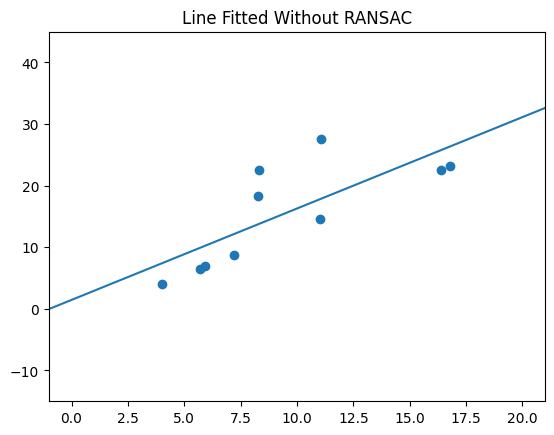

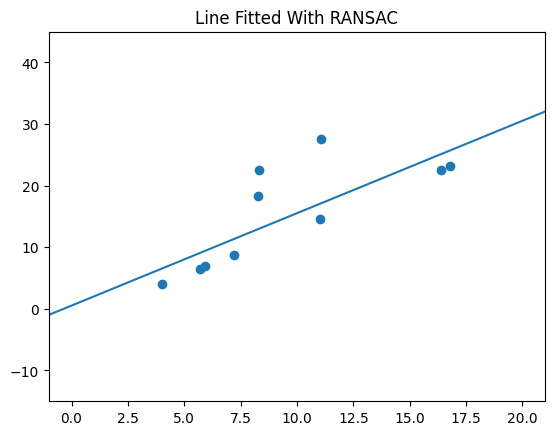

In [13]:
# Without RANSAC
line_parameters = fit_a_line_without_ransac(points_with_some_outliers)
plot_the_result(points_with_some_outliers, line_parameters, "Line Fitted Without RANSAC")

# With RANSAC
line_parameters_RANSAC = fit_a_line_with_ransac(points_with_some_outliers, 2, 8, 200)
plot_the_result(points_with_some_outliers, line_parameters_RANSAC, "Line Fitted With RANSAC")